## 4.1 범주형 변수

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
import os, mglearn
import pandas as pd

data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
                   header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                          'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
                          'native-country', 'income'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
for i in data.columns:
    print('<< ', i, " >>\n")
    print(data[str(i)].value_counts())
    print('\n-------------------------------\n\n')

<<  age  >>

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

-------------------------------


<<  workclass  >>

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

-------------------------------


<<  fnlwgt  >>

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64

-------------------------------


<<  education  >>

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school     

In [7]:
print('원본 특성:\n', list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print('get_dummies 후의 특성:\n', list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'] 

get_dummies 후의 특성:
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spou

In [8]:
data_dummies.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print('X.shape: {} y.shape: {}'.format(X.shape, y.shape))

X.shape: (32561, 53) y.shape: (32561,)


- loc: 컬럼명으로
- iloc: 인덱스로

In [10]:
# my
X = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
y = data_dummies.iloc[:, -1]
print(X.shape, y.shape)

(32561, 53) (32561,)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test,y_test))

0.7956025058346641


## 4.1.2 숫자로 표현된 번주형 특성

In [12]:
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1], '범주형 특성': ['양말', '여우', '양말' ,'상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [13]:
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [14]:
# 방법1: 인코딩할 열 명시
pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [15]:
# 방법2: 숫자로 표현된 범주형 특성열을 문자열로 변경
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df)

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 4.2 OneHotEncoder & ColumnTransformer
-  ## scikit-learn으로 범주형 변수 다루기

In [16]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False) # sparse=False : 원핫인코더가 희소 행렬이 아니라 넘파이 행렬을 반환
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [17]:
ohe = OneHotEncoder(sparse=True)
print(ohe.fit_transform(demo_df)) # 내가 보니 좌측은 인덱스고 우측은 (0 아닌) 값 표시인듯?

  (0, 0)	1.0
  (0, 4)	1.0
  (1, 1)	1.0
  (1, 5)	1.0
  (2, 2)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (3, 3)	1.0


In [18]:
ohe.get_feature_names()

array(['x0_0', 'x0_1', 'x0_2', 'x1_상자', 'x1_양말', 'x1_여우'], dtype=object)

#### 대부분의 애플리케이션에서 일부 특성은 범주형, 일부는 연속형.
- <font color = 'red'>OneHotEncoder는 모든 특성을 범주형이라고 가정한다. </font>
##### ColumnTransformer 클래스를 통해 입력 데이터에 있는 열마다 다른 변환 적용

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
    ('scaling', StandardScaler(), ['age', 'hours-per-week']),
     ('onehot', OneHotEncoder(sparse=False),
      ['workclass', 'education', 'gender', 'occupation'])
])

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop('income', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop('income', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [22]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print('test score: {:.2f}'.format(logreg.score(X_test_trans, y_test)))

test score: 0.81


In [23]:
ct.named_transformers_.onehot

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

## 4.3 make_column_transformner로 간편하게 ColumnTransformer 만들기

In [24]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer((['age', 'hours-per-week'], StandardScaler()),
                            (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse=False)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:778: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


## 4.4 구간 분할(bining, 이산화)  ,  선형 모델 & 트리 모델

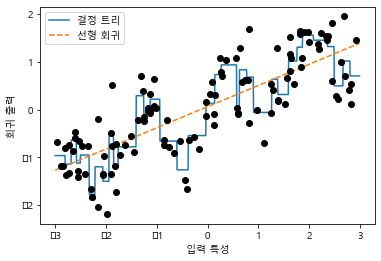

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1 ,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label='결정 트리')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label='선형 회귀')
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

In [26]:
from sklearn.preprocessing import KBinsDiscretizer

In [27]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print('bin edges: \n', kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [28]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [29]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [30]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, '입력 특성')

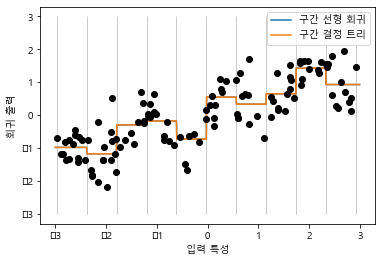

In [31]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')

In [32]:
# 두 모델이 완전히 겹쳤다: 선형 회귀는 구간별로 나누었더니 훨씬 유연해졌다 (결정 트리는 덜 유연해짐)

## 4.5 상호작용(interaction)과 다항식(polynomial)
#### 특별히 특성을 풍부하게 나타내기위해 둘을 추가함

In [33]:
X_combined = np.hstack([X, X_binned])
X_combined.shape

(120, 11)

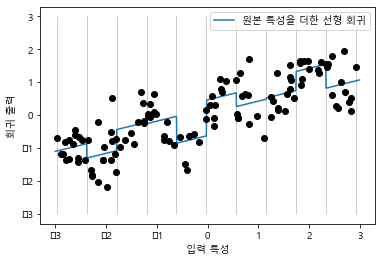

In [34]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.plot(X[:, 0], y, 'o', c='k')

In [35]:
X_product = np.hstack([X_binned, X * X_binned]) 
# X_binned는 데이터 포인트가 속한 구간의 원핫인코딩이므로 X를 곱하면 해당 구간 이외에는 모두 0이 된다
print(X_product.shape)

(120, 20)


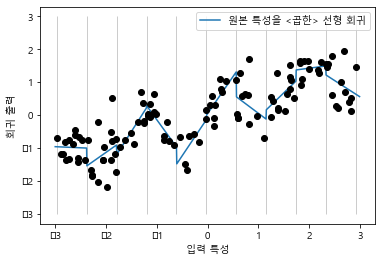

In [36]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 <곱한> 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.plot(X[:, 0], y, 'o', c='k')

In [37]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10 까지 고차항을 추가한다. 기본값인 include_bias=True는 절편에 해당하는 1인 특성을 추가한다.
poly = PolynomialFeatures(degree=10, include_bias=False) # 10차원 -> 10개 특성 만들어짐 (include_bias=True 시 +1)
poly.fit(X)
X_poly = poly.transform(X)

In [38]:
X_poly.shape

(120, 10)

In [39]:
print('X 원소:\n', X[:5])
print('X_poly 원소:\n', X_poly[:5])

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [40]:
print('항 이름:\n', poly.get_feature_names())

항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


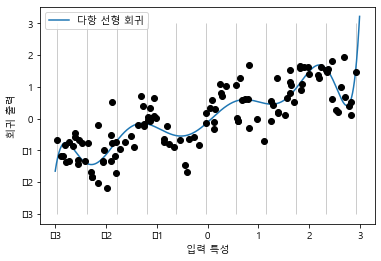

In [41]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.plot(X[:, 0], y, 'o', c='k')

In [42]:
# 다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만들지만, 고차원 다항식은 데이터가 부족한 영역에서 너무 민감하게 동작

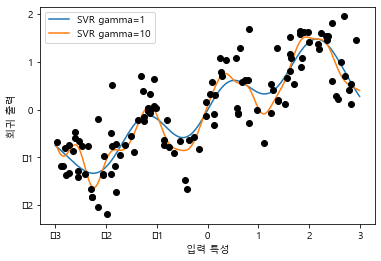

In [43]:
# 비교를 위해 아무런 변환도 거치지 않은 원본 데이터에 커널SVM 모델 학습

from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.plot(X[:, 0], y, 'o', c='k')

In [44]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [46]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(X_train.shape)
print(X_train_poly.shape)

(379, 13)
(379, 105)


In [47]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수: {:.3f}'.format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print('상호작용 특성이 있을 때 점수: {:.3f}'.format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [49]:
# 상호작용 & 다항식 특성이 Ridge의 성능을 크게 높였다.
# 랜덤 포레스트 같이 복잡한 모델을 사용하면 다른 결과

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print('상호작용 특성이 없을 때 점수: {:.3f}'.format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print('상호작용 특성이 있을 때 점수: {:.3f}'.format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.774


## 4.6 일변량 비선형 변환

In [51]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [52]:
print('특성 출현 횟수:\n', np.bincount(X[:, 0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

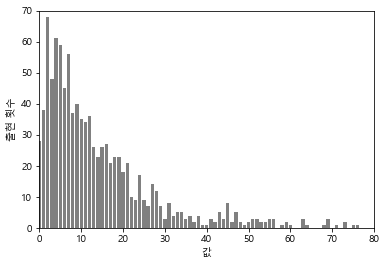

In [53]:
plt.xlim(0, 80)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

Text(0.5, 0, '값')

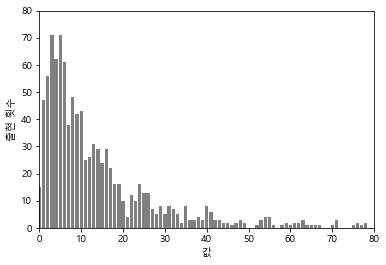

In [54]:
plt.xlim(0, 80)
plt.ylim(0, 80)
bins = np.bincount(X[:, 2])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

In [55]:
# 전형적인 푸아송 분포. 이런 데이터는 선형 모델이 잘 처리하지 못함.

In [56]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.622


In [57]:
X_train_log = np.log(X_train + 1)   # log0 -> -inf 따라서 log(X+1) 변환
X_test_log = np.log(X_test + 1)

Text(0.5, 0, '값')

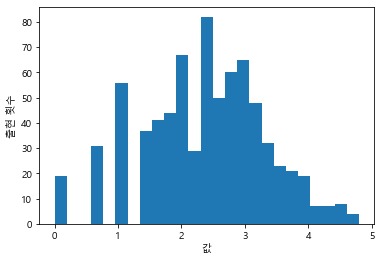

In [58]:
plt.hist(X_train_log[:, 0], bins=25)
plt.ylabel('출현 횟수')
plt.xlabel('값')

In [59]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.875


# 4.7 특성 자동 선택
#### 모델 복잡도 감소 & 일반화 성능 증가(과대적합 감소)를 위해, 가장 유용한 특성만 선택하여 특성의 수를 줄인다.

<font color='red'>

### 1. 일변량 통계 (univariate statistics)
### 2. 모델 기반 선택 (model-based selection)
### 3. 반복적 선택 (iterative selection)

</font>

##### 모두 지도 학습 방법이므로 최적값 찾으려면 타깃값 필요.

## 1. 일변량 통계 (univariate statistics)

#### 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산 -> 선택
#### 분류에서는 *분산분석(ANOVA, ANalysis Of VAriance)이라고 한다:
- *데이터를 클래스별로 나누어 평균을 비교하는 방법. 어떤 특성의 F-값이 높으면 그 특성은 클래스별 평균이 서로 다르다는 뜻

### 일변량: 각 특성이 독립적으로 평가된다

In [60]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킨다
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성 추가. 처음 30개는 원본 특성, 다음 50개는 노이즈
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(score_func = f_classif, percentile=50)  # 특성의 50% 선택
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape', X_train.shape)
print('X_train_selected.shape', X_train_selected.shape)

X_train.shape (284, 80)
X_train_selected.shape (284, 40)


In [62]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x257706c2108>],
 <a list of 1 Text yticklabel objects>)

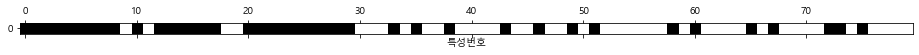

In [66]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('특성번호')
plt.yticks([0])

In [67]:
# 마스킹된 그래프에서 볼 수 있듯, 대부분 원본 특성이 선택되었고 노이즈 특성이 거의 제거 되었다. 완벽하진 x.

In [69]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('전체 특성을 사용한 점수: {:.3f}'.format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


## 2. 모델 기반 선택 (model-based selection)

In [71]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                         threshold='median')   # 절반 가량의 특성이 선택될 수 있도록 중간값을 특성 선택 임계치로 사용

In [72]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape', X_train.shape)
print('X_train_l1.shape', X_train_l1.shape)

X_train.shape (284, 80)
X_train_l1.shape (284, 40)


([<matplotlib.axis.YTick at 0x25774d6a948>],
 <a list of 1 Text yticklabel objects>)

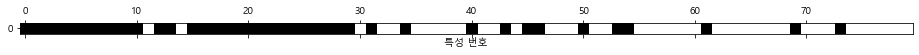

In [78]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')  # True는 검은색, False는 흰색으로 마스킹
plt.xlabel('특성 번호')
plt.yticks([0])

In [79]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.951


## 3. 반복적 선택 (iterative selection)

#### 특성의 수가 각기 다른 일련의 모델 만들어, 어떤 종료 조건이 될 때까지 특성을 (1) 0개에서 하나씩 늘리거나 (2) 모든 특성에서 하나씩 뺌
#### ex. 재귀적 특성 제거 (RFE, Reculsive Feature Elemination)

([<matplotlib.axis.YTick at 0x25774e03948>],
 <a list of 1 Text yticklabel objects>)

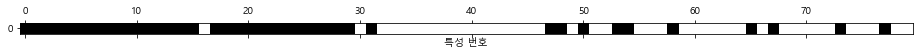

In [107]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)

# 선택된 특성을 표시
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])

In [108]:
# 앞서 살펴본 일변량 분석이나 모델 기반 선택보다 나아졌지만, 여전히 특성 한 개 놓쳤음.
# 랜던포레스트 모델은 특성이 누락될 때마다 다시 학습하므로 40번이나 실행됨

In [109]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.951


In [141]:
# RFE로 특성 선택이 잘 되면 선형 모델의 성능은 랜덤 포레스트와 견줄만함을 볼 수 있다.

## 4.8 전문가 지식 활용

In [142]:
citibike = mglearn.datasets.load_citibike()

print('시티 바이크 데이터:\n', citibike.head())

시티 바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

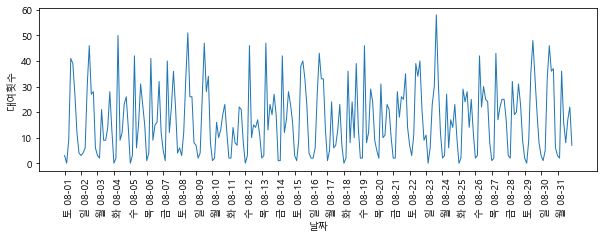

In [169]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ['일', '월', '화', '수', '목', '금', '토']
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime('%w'),
                                              xticks.strftime(' %m-%d'))]
plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('날짜')
plt.ylabel('대여횟수')

In [172]:
# 타깃값 추출 (대여 횟수)
y = citibike.values

# POSIX 시간을 10**9로 나누어 변환
X = citibike.index.astype('int64').values.reshape(-1, 1) // 10**9

In [173]:
print(y.shape, y[:10])
print(X.shape, X[:10])

(248,) [ 3  0  9 41 39 27 12  4  3  4]
(248, 1) [[1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]
 [1438441200]
 [1438452000]
 [1438462800]
 [1438473600]
 [1438484400]]


In [174]:
citibike.index[:10]

DatetimeIndex(['2015-08-01 00:00:00', '2015-08-01 03:00:00',
               '2015-08-01 06:00:00', '2015-08-01 09:00:00',
               '2015-08-01 12:00:00', '2015-08-01 15:00:00',
               '2015-08-01 18:00:00', '2015-08-01 21:00:00',
               '2015-08-02 00:00:00', '2015-08-02 03:00:00'],
              dtype='datetime64[ns]', name='starttime', freq='3H')

In [175]:
citibike.index.values[:10]

array(['2015-08-01T00:00:00.000000000', '2015-08-01T03:00:00.000000000',
       '2015-08-01T06:00:00.000000000', '2015-08-01T09:00:00.000000000',
       '2015-08-01T12:00:00.000000000', '2015-08-01T15:00:00.000000000',
       '2015-08-01T18:00:00.000000000', '2015-08-01T21:00:00.000000000',
       '2015-08-02T00:00:00.000000000', '2015-08-02T03:00:00.000000000'],
      dtype='datetime64[ns]')

In [180]:
# 처음 184개 데이터 포인트(처음 23일치)를 훈련 세트로 사용하고 나머지(남은 8일치)는 테스트 세트로 사용
n_train = 184

# 주어진 특성을 사용해 평가하고 그래프 만듦
def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print('테스트 세트 R^2: {:.3f}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha='left')
    
    plt.plot(range(n_train), y_train, label='훈련')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='테스트')
    plt.plot(range(n_train), y_pred_train, '--', label='훈련 예측')
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='테스트 예측')
    plt.legend(loc='best')
    
    plt.xlabel('날짜')
    plt.ylabel('대여횟수')
    

테스트 세트 R^2: -0.035


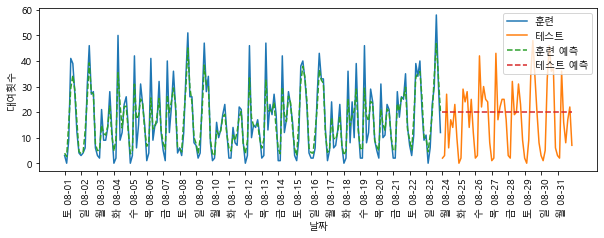

In [181]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

#### 훈련 세트 예측은 매우 정확하지만, 테스트 세트는 한 가지 값으로만 예측함. 상관계수가 거의 0에 가깝다 (아무것도 학습되지 않았다.)
##### <font color='red'>트리 모델인 랜덤포레스트는 훈련 세트에 있는 특성의 (시간) 범위 밖으로 외삽(Extrapolation)할 능력이 없다.</font>
#### 즉, 테스트 세트와 가장 가까운 마지막 훈련 세트 데이터 타깃값으로 예측했던 것.
### <font color='red'> - 전문가 지식을 활용, 시간과 요일이라는 두 요소가 중요해 보이므로 특성으로 추가</font>

테스트 세트 R^2: 0.600


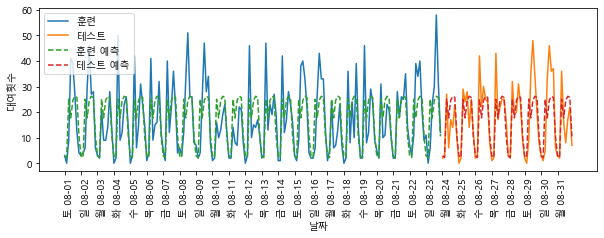

In [186]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

In [187]:
# 아까보단 낫지만 주간 패턴은 예측하지 못하는 것 같다. 요일 추가해보자

테스트 세트 R^2: 0.842


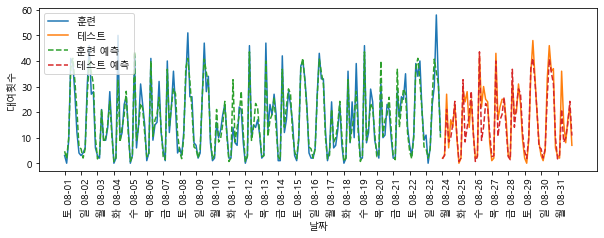

In [188]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: 0.132


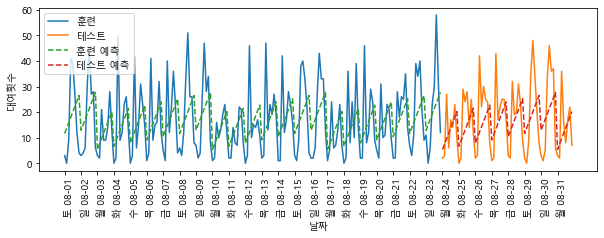

In [189]:
eval_on_features(X_hour_week, y, LinearRegression())  # 더 간단한 모델인 LinearRegression 적용시

In [190]:
# 성능과 패턴이 좋지 않은 이유는 요일과 시간이 정수로 인코딩되어 있어서 연속형 변수로 해석되기 때문.
# 선형 모델은 시간을 선형 함수로만 학습할 수 있어서, 하루에서 시간이 흐를 수록 대여 수가 늘어나게 학습된 것.
# 이 패턴을 잡아내기 위해 원핫인코딩

In [191]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

테스트 세트 R^2: 0.619


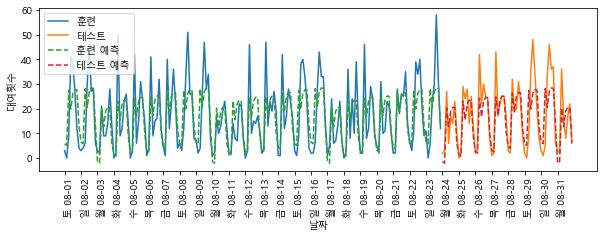

In [195]:
eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: 0.845


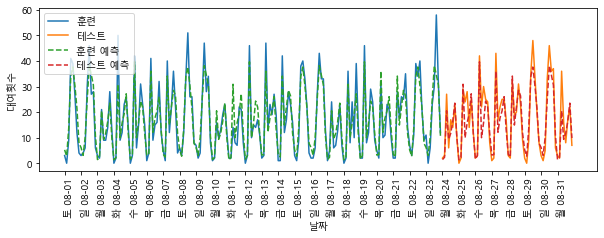

In [196]:
# 상호작용 특성을 사용해 시간과 요일의 조합별 계수를 학습

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [198]:
# 특성 변환을 통해 모델의 성능이 랜덤포레스트와 비슷해짐.
# 랜덤포레스트와 달리 무엇이 학습되었는지가 명확하다(모델이 학습한 계수를 그래프로 나타낼 수 있다)

In [199]:
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['월', '화', '수', '목', '금', '토', '일']
features = day + hour

In [200]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수 크기')

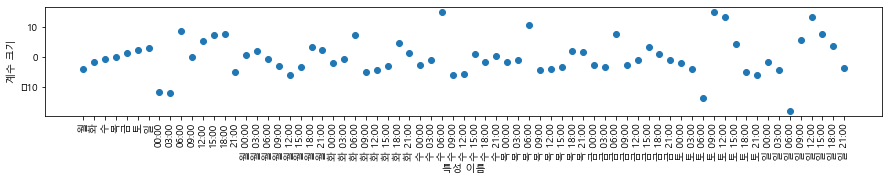

In [201]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel('특성 이름')
plt.ylabel('계수 크기')